# Importing some modules

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

tf.keras.backend.set_floatx('float64')
tf.random.set_seed(1)
np.random.seed(1)

# Retrieving data

In [2]:
from example import x, t, y

print('data shape:', x.shape, t.shape, y.shape)

data shape: (500, 500) (500, 500) (2, 500, 500)


## Reshape data for Dense network

In [3]:
X = np.reshape([x, t], (2, -1)).T
Y = y.reshape(2, -1).T
X.shape, Y.shape

((250000, 2), (250000, 2))

In [4]:
# splitting the dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.50,
                                                    random_state=0)
X_train.shape, y_test.shape

((125000, 2), (125000, 2))

# Build the model

In [5]:
model = Sequential()

model.add(Dense(10))
model.add(Activation('elu'))

model.add(Dense(10))
model.add(Activation('elu'))

# final layer: a neuron with linear activation acts like a summation operator.
model.add(Dense(2))

opt = optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError(name='loss')

model.compile(optimizer=opt, loss=loss, metrics=['mae'])

In [6]:
# training options

# https://keras.io/api/callbacks/early_stopping/
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# fit options
params = dict(epochs=100,
              batch_size=128,
              verbose=2,
              validation_split=0.4,
              callbacks=[early_stopping])

In [7]:
# train the model

history = model.fit(X_train, y_train, **params)

Epoch 1/100
586/586 - 2s - loss: 398.4724 - mae: 6.6289 - val_loss: 241.4443 - val_mae: 6.2848
Epoch 2/100
586/586 - 1s - loss: 181.1296 - mae: 5.6070 - val_loss: 146.2353 - val_mae: 4.9783
Epoch 3/100
586/586 - 1s - loss: 113.4885 - mae: 4.4116 - val_loss: 94.4061 - val_mae: 3.7807
Epoch 4/100
586/586 - 1s - loss: 73.1066 - mae: 3.4701 - val_loss: 62.2864 - val_mae: 3.2086
Epoch 5/100
586/586 - 1s - loss: 49.4561 - mae: 2.9541 - val_loss: 43.8268 - val_mae: 2.7779
Epoch 6/100
586/586 - 1s - loss: 35.8512 - mae: 2.5867 - val_loss: 34.1626 - val_mae: 2.3910
Epoch 7/100
586/586 - 1s - loss: 27.5907 - mae: 2.2859 - val_loss: 26.1008 - val_mae: 2.1865
Epoch 8/100
586/586 - 1s - loss: 22.0426 - mae: 2.1061 - val_loss: 20.9428 - val_mae: 2.0509
Epoch 9/100
586/586 - 1s - loss: 17.8567 - mae: 1.9664 - val_loss: 17.1121 - val_mae: 1.9292
Epoch 10/100
586/586 - 1s - loss: 14.8442 - mae: 1.8873 - val_loss: 14.4550 - val_mae: 1.8886
Epoch 11/100
586/586 - 1s - loss: 12.5993 - mae: 1.8423 - val_lo

Epoch 90/100
586/586 - 1s - loss: 0.6817 - mae: 0.4717 - val_loss: 0.6322 - val_mae: 0.4667
Epoch 91/100
586/586 - 1s - loss: 0.6476 - mae: 0.4667 - val_loss: 0.6425 - val_mae: 0.4646
Epoch 92/100
586/586 - 1s - loss: 0.6672 - mae: 0.4672 - val_loss: 0.6333 - val_mae: 0.4630
Epoch 93/100
586/586 - 1s - loss: 0.6577 - mae: 0.4652 - val_loss: 0.6217 - val_mae: 0.4606
Epoch 94/100
586/586 - 1s - loss: 0.6467 - mae: 0.4631 - val_loss: 0.6323 - val_mae: 0.4613
Epoch 95/100
586/586 - 1s - loss: 0.6519 - mae: 0.4624 - val_loss: 0.6312 - val_mae: 0.4550
Epoch 96/100
586/586 - 1s - loss: 0.6511 - mae: 0.4624 - val_loss: 0.7256 - val_mae: 0.4589
Epoch 97/100
586/586 - 1s - loss: 0.6378 - mae: 0.4591 - val_loss: 0.6238 - val_mae: 0.4573
Epoch 98/100
586/586 - 1s - loss: 0.6415 - mae: 0.4574 - val_loss: 0.8306 - val_mae: 0.4652
Epoch 99/100
586/586 - 1s - loss: 0.6452 - mae: 0.4574 - val_loss: 0.6936 - val_mae: 0.4539
Epoch 100/100
586/586 - 1s - loss: 0.6433 - mae: 0.4560 - val_loss: 0.6353 - val

# Model accuracy with MAE

In [8]:
p = model.predict(X_test)
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy().mean()

p = model.predict(X_train)
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy().mean()

print('MAE for training set: %.2e' % mae_train)
print('MAE for test     set: %.2e' % mae_test)

MAE for training set: 4.54e-01
MAE for test     set: 4.54e-01


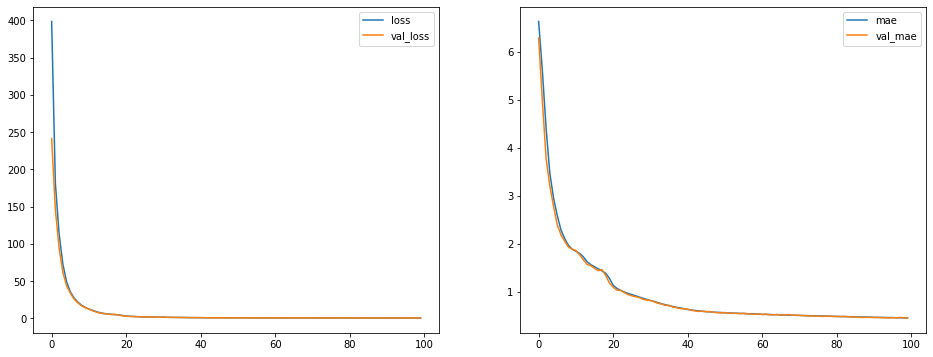

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

ax1.plot((loss), label='loss')
ax1.plot((val_loss), label='val_loss')
ax1.legend()

ax2.plot((mae), label='mae')
ax2.plot((val_mae), label='val_mae')
ax2.legend()